In [29]:
import numpy as np
from matplotlib import pyplot as plt
from utils import read_bin

Read CVs data

In [30]:
new_cvs_str = np.load('../CVs_data/5A+water_strings.npy')

Read MLP model accuracy drop

In [31]:
mlp_acc_drop_all = []
a=read_bin('../MLP_results/bigdata/water/a_drop_all')
for i in range(10):
    mlp_data = a[0][i]
    mlp_data_single = np.mean(mlp_data, axis=1)*100
    mlp_acc_drop_all.append(mlp_data_single)
mlp_acc_drop = np.mean(mlp_acc_drop_all, axis=0)

Read GBDT model features importance

In [32]:
gbdt_fea_imp_all = read_bin('../GBDT_results/bigdata/water/feature_importances_all')[0]
gbdt_fea_imp = np.mean(gbdt_fea_imp_all,axis=0)

Get the top 100 CVs of importance in the two models.

In [33]:
gbdt_top = sorted(enumerate(gbdt_fea_imp), key=lambda x:x[1])[-100:]
mlp_top = sorted(enumerate(mlp_acc_drop), key=lambda x:x[1])[:100]
topboth = []
for i in range(len(gbdt_top)):
    for j in range(len(mlp_top)):
        if gbdt_top[i][0]==mlp_top[j][0]:
            topboth.append(gbdt_top[i][0])

Obtain CVs that are important to both models

In [34]:
gbdt_shared = []
mlp_shared = []
for g in gbdt_top:
    for m in mlp_top:
        if g[0]==m[0]:
            gbdt_shared.append(g)
            mlp_shared.append(m)
gbdt_shared.sort()
mlp_shared.sort()

Draw a comparison of the importance of CVs in the two models.

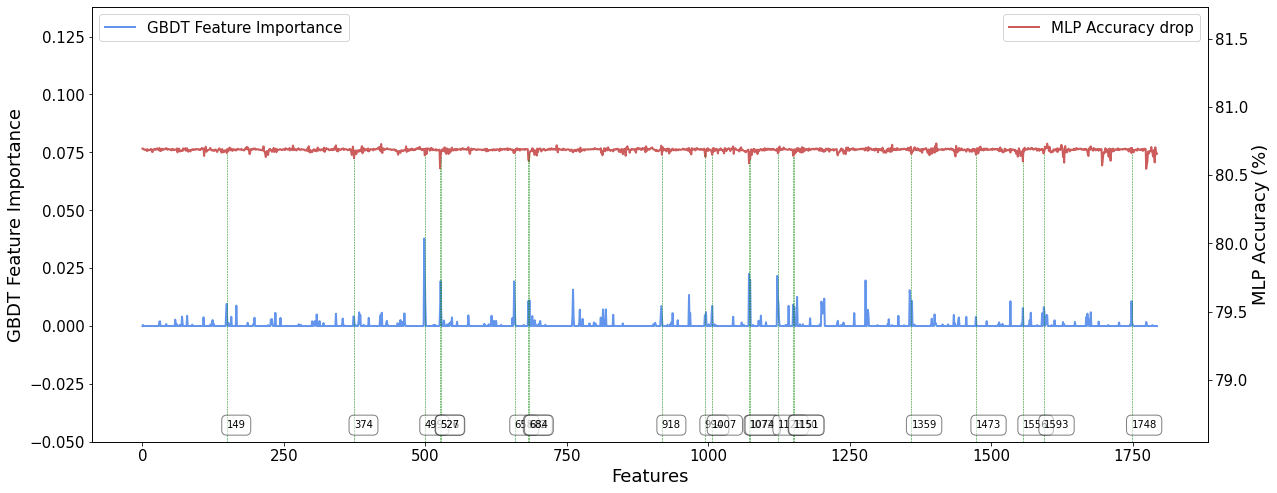

In [35]:
plt.figure(figsize=(20,8))
plt.plot(gbdt_fea_imp,linewidth=2, color='cornflowerblue', label='GBDT Feature Importance')
plt.xlabel('Features',fontsize=18)
plt.ylabel('GBDT Feature Importance',fontsize=18)
plt.legend(loc='upper left',fontsize=15)
plt.ylim(min(gbdt_fea_imp)-0.05,max(gbdt_fea_imp)+0.1)
plt.yticks(size=15)
plt.xticks(size=15)


plt.twinx()
plt.plot(mlp_acc_drop,linewidth=2, color='indianred',label='MLP Accuracy drop')
plt.ylabel('MLP Accuracy (%)',fontsize=18)
plt.ylim(min(mlp_acc_drop)-2,max(mlp_acc_drop)+1)
plt.yticks(size=15)
plt.legend(loc='upper right',fontsize=15)

for i in range(len(gbdt_shared)):
    #plt.annotate(str(round(gbdt_shared[i][1],2)),gbdt_shared[i])
    plt.annotate(str(mlp_shared[i][0]),(mlp_shared[i][0],min(mlp_acc_drop)-1.9),bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='k', lw=1, alpha=0.5))
    #plt.plot(gbdt_shared[i][0],min(gbdt_shared[i][1],mlp_shared[i][1]),marker = "o",markersize=8)
    plt.plot([mlp_shared[i][0],mlp_shared[i][0]],[min(mlp_acc_drop)-2,mlp_shared[i][1]], c='g', linestyle='--',linewidth=0.5)

Show the atoms corresponding to all filtered CVs.

In [36]:
impor_res= {}
for i in range(len(gbdt_shared)):
    cv_index = gbdt_shared[i][0]
    print(cv_index)
    cv = new_cvs_str[cv_index]
    if cv[1] not in impor_res.keys():
        impor_res[cv[1]]=1
    else:
        impor_res[cv[1]]+=1
    print(cv)

149
['resname LIG and resSeq 299 and name C2 '
 'resname HOH and resSeq 391 and name H2 ']
374
['resname LIG and resSeq 299 and name N5 '
 'resname HOH and resSeq 385 and name H1 ']
499
['resname LIG and resSeq 299 and name N7 '
 'resname HIS and resSeq 84 and name N ']
526
['resname LIG and resSeq 299 and name N7 '
 'resname HOH and resSeq 384 and name O ']
527
['resname LIG and resSeq 299 and name N7 '
 'resname HOH and resSeq 384 and name H1 ']
658
['resname LIG and resSeq 299 and name N9 '
 'resname HIS and resSeq 84 and name O ']
682
['resname LIG and resSeq 299 and name N9 '
 'resname HOH and resSeq 384 and name O ']
684
['resname LIG and resSeq 299 and name N9 '
 'resname HOH and resSeq 384 and name H2 ']
918
['resname LIG and resSeq 299 and name C12 '
 'resname HOH and resSeq 384 and name H2 ']
994
['resname LIG and resSeq 299 and name N13 '
 'resname HOH and resSeq 384 and name O ']
1007
['resname LIG and resSeq 299 and name N13 '
 'resname HOH and resSeq 391 and name H2 ']
10

In [37]:
impor_res

{'resname HOH and resSeq 391 and name H2 ': 2,
 'resname HOH and resSeq 385 and name H1 ': 1,
 'resname HIS and resSeq 84 and name N ': 2,
 'resname HOH and resSeq 384 and name O ': 5,
 'resname HOH and resSeq 384 and name H1 ': 2,
 'resname HIS and resSeq 84 and name O ': 1,
 'resname HOH and resSeq 384 and name H2 ': 3,
 'resname HIS and resSeq 84 and name C ': 2,
 'resname HOH and resSeq 389 and name H2 ': 1,
 'resname HOH and resSeq 392 and name H2 ': 1,
 'resname HIS and resSeq 84 and name CA ': 1}

GBDT Accuracy

In [38]:
GBDT_score_all=read_bin('../GBDT_results/bigdata/water/acc_all')[0]

In [42]:
GBDT_mean_Train = np.mean(GBDT_score_all,axis=0)[0]*100
GBDT_mean_Test = np.mean(GBDT_score_all,axis=0)[1]*100
GBDT_max_Train = max(GBDT_score_all, key=lambda x:x[0])[0]*100
GBDT_max_Test = max(GBDT_score_all, key=lambda x:x[1])[1]*100
GBDT_min_Train = min(GBDT_score_all, key=lambda x:x[0])[0]*100
GBDT_min_Test = min(GBDT_score_all, key=lambda x:x[1])[1]*100

In [43]:
print('Mean accuracy: ', 'Train:', GBDT_mean_Train, ' Test:',GBDT_mean_Test)
print('Best accuracy: ', 'Train:', GBDT_max_Train, ' Test:',GBDT_max_Test)
print('Worst accuracy: ', 'Train:', GBDT_min_Train, ' Test:',GBDT_min_Test)

Mean accuracy:  Train: 79.00793103448277  Test: 76.47111111111113
Best accuracy:  Train: 79.2816091954023  Test: 77.48888888888888
Worst accuracy:  Train: 78.77471264367816  Test: 75.72444444444444


MLP Accuracy

In [44]:
mlp_train_score = read_bin('../MLP_results/bigdata/water/acc_all')[0][0]
mlp_val_score = read_bin('../MLP_results/bigdata/water/acc_all')[0][1]
mlp_test_score = read_bin('../MLP_results/bigdata/water/acc_all')[0][2]

In [45]:
mlp_mean_train = np.mean(mlp_train_score)*100
mlp_mean_val = np.mean(mlp_val_score)*100
mlp_mean_test = np.mean(mlp_test_score,axis=0)[1]*100
mlp_max_train = max(mlp_train_score)*100
mlp_max_val = max(mlp_val_score)*100
mlp_max_test = max(mlp_test_score, key=lambda x:x[1])[1]*100
mlp_min_train = min(mlp_train_score)*100
mlp_min_val = min(mlp_val_score)*100
mlp_min_test = min(mlp_test_score, key=lambda x:x[1])[1]*100

In [46]:
print('Mean accuracy: ', 'Train:', mlp_mean_train, ' Val:',mlp_mean_val,' Test:',mlp_mean_test)
print('Best accuracy: ', 'Train:', mlp_max_train, ' Val:',mlp_max_val,' Test:',mlp_max_test)
print('Worst accuracy: ', 'Train:', mlp_min_train, ' Val:',mlp_min_val,' Test:',mlp_min_test)

Mean accuracy:  Train: 92.62672483921051  Val: 71.89022958278656  Test: 75.03822207450867
Best accuracy:  Train: 94.10775899887085  Val: 73.28735589981079  Test: 77.94222235679626
Worst accuracy:  Train: 89.61781859397888  Val: 70.71838974952698  Test: 69.0666675567627
